# Linear Regression - Health Insurance Charges

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading the dataset
insurance = pd.read_csv('insurance.csv')

# Converting the string to number
insurance['smoker'] = np.where((insurance.smoker == 'yes'), 1, 0)
insurance['sex'] = np.where((insurance.sex == 'male'), 1, 0)

# Sample
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [3]:
# Converting to a number
insurance['sex'] = insurance['sex'].astype(str).astype(int)
insurance['smoker'] = insurance['smoker'].astype(str).astype(int)

# Info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [4]:
# Summary statistics
insurance.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Data Exploratory

In [5]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

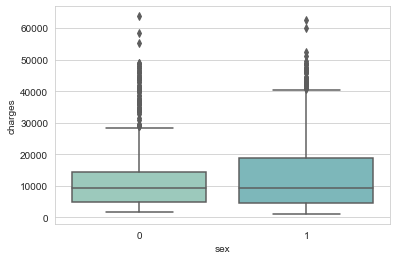

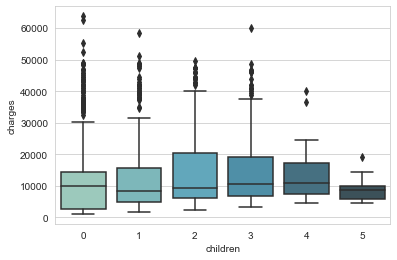

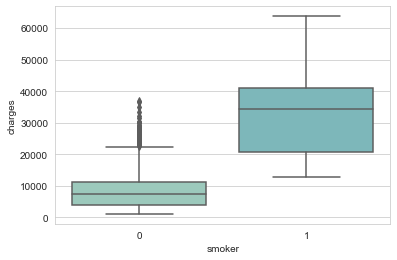

In [6]:
for index,columnnames in enumerate(insurance[['sex', 'children', 'smoker']]):
    plt.figure(index)
    sns.boxplot(x=columnnames, y='charges', data=insurance)

<Figure size 432x288 with 0 Axes>

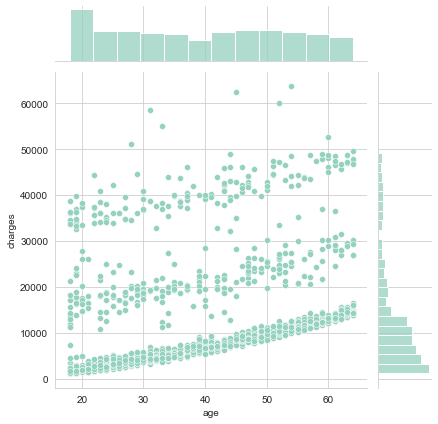

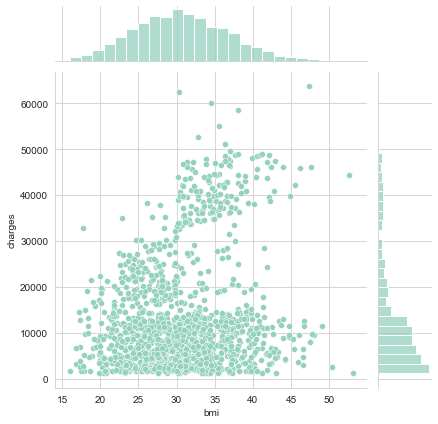

In [7]:
for index, columnnames in enumerate(insurance[['age', 'bmi']]):
    plt.figure(index)
    sns.jointplot(x=columnnames, y='charges', data=insurance)

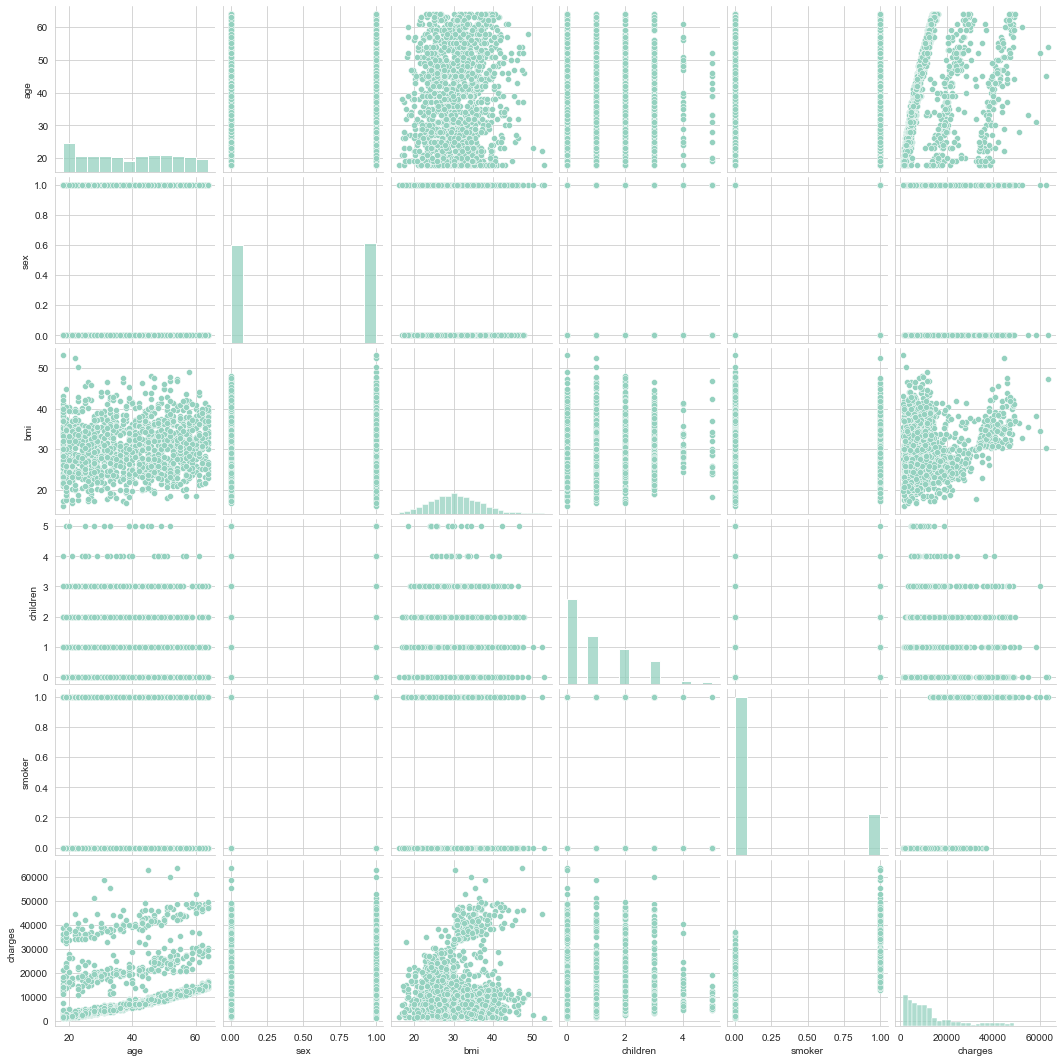

In [53]:
# Pairplot
sns.pairplot(insurance)

<Figure size 432x288 with 0 Axes>

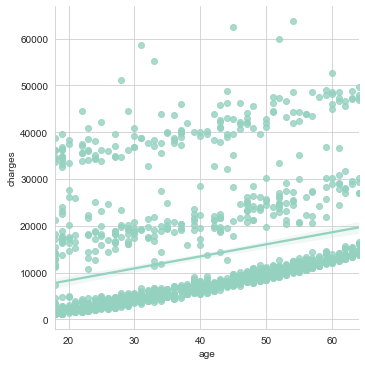

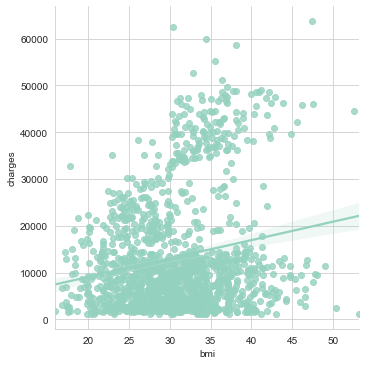

In [59]:
# Creating an lmplot 
for index, columnnames in enumerate(insurance[['age','bmi']]):
    plt.figure(i)
    sns.lmplot(x=columnnames, y='charges', data=insurance)      

# Machine Learning

In [15]:
y = insurance['charges'] # Dependent variable
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker']] # Independent variables

In [17]:
# Splitting the model into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 104)

In [20]:
# Creating an instance of linearRegression model 
lm = LinearRegression()

In [26]:
# Fit on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Let's print out the coefficients
lm.coef_

array([ 2.60912270e+02, -2.25336407e+01,  3.13112459e+02,  3.27461074e+02,
        2.41682496e+04])

In [31]:
pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coefficient'])

,Coefficient
age,260.912270
sex,-22.533641
bmi,313.112459
children,327.461074
smoker,24168.249573


# Prediction

In [34]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Predicted vs y_test')

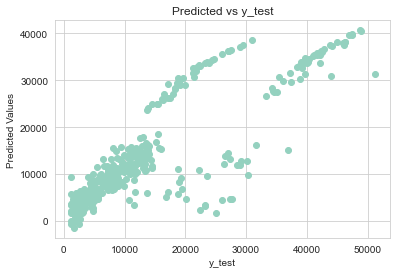

In [36]:
# Now let's compare the prediction with residuals to see how close the results are
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predicted Values')
plt.title('Predicted vs y_test')

# Model Evaluation

In [38]:
metrics = {'MAE': metrics.mean_absolute_error(y_test, predictions),
          'MSE': metrics.mean_squared_error(y_test, predictions),
          'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions))}

In [42]:
pd.DataFrame(metrics.items(), columns = ['Metrics', 'Values'])

,Metrics,Values
0,MAE,4.274135e+03
1,MSE,3.946929e+07
2,RMSE,6.282459e+03


 # Residuals

C:\Users\hukha\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


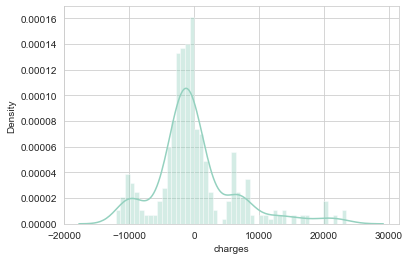

In [46]:
sns.distplot((y_test-predictions), bins=50)